## Importing the Libraries

In [1]:
## Supress warnings
import warnings
warnings.filterwarnings('ignore')

## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
pd.set_option('display.max_rows',100)

## Reading the Data

In [2]:
## read the data
car_data = pd.read_csv('CarPrice_Assignment.csv')

## size of the dataset
print('The size of the data set is {}'.format(len(car_data)))

## sample dataset 
car_data.sample(5)

The size of the data set is 205


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
88,89,-1,mitsubishi mirage g4,gas,std,four,sedan,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116,5500,23,30,9279.0
76,77,2,mitsubishi mirage,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68,5500,37,41,5389.0
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
70,71,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
97,98,1,nissan note,gas,std,four,wagon,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7999.0


In [3]:
## Get the information as per the data
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
## Describe the data
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Data Preparation

In [5]:
## Check for Null Values
car_data.isnull().sum()*100/len(car_data)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

## Exploratory Data Analysis (EDA)

### Univariate Analysis


##### Price Variable

Text(0.5,1,'Distribution Plot of Price')

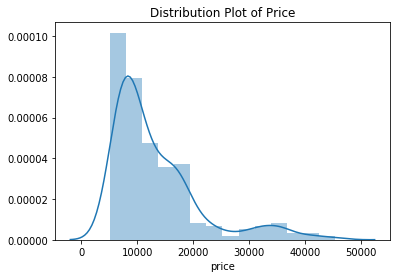

In [6]:
sns.distplot(car_data['price'])
plt.title('Distribution Plot of Price')

#### From the figure we can derive the following insight:
 - Mean and median of the price is significantly different.
 - There is large variance in the data from the mean point.
 - Large volume of data is concentrated towrds the left side, In other words we can say thet the price column is right skewed because most prices of the car are at lower end
     

##### Symboling Variable

Text(0,0.5,'Average Pricein Dollars')

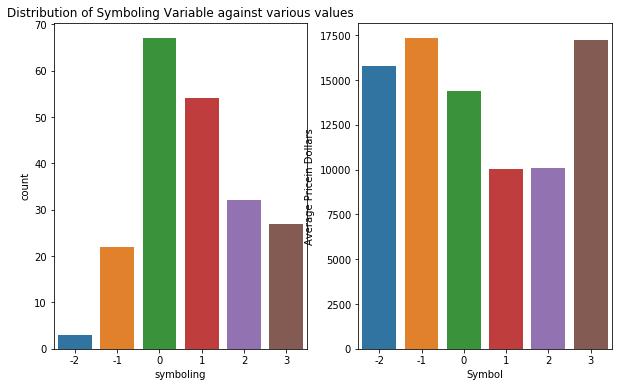

In [7]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(car_data['symboling'])
plt.title('Distribution of Symboling Variable against various values')

plt.subplot(1,2,2)
df = car_data[['symboling','price']].groupby('symboling').mean().reset_index()
sns.barplot(x = 'symboling',y='price',data=df)
plt.xlabel('Symbol')
plt.ylabel('Average Pricein Dollars')

From the above plots we can extract the following insights:

- More cars range in the value of 0 or 1.
- Average price of cars is lower for 0,1 and 2 category.

##### Car Name Variable

In [8]:
## View the sample data for car name column
car_data.CarName.values[0:10]

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 100ls', 'audi 5000', 'audi 4000',
       'audi 5000s (diesel)'], dtype=object)

##### Observations:

- From the above sample we can say that Car Name contains two parts mainly
    - 'car company'
    - 'car model'
- Format of the CarName is 'car company' + ''+ 'car_model'. 
- As we are most likely interested in the car company, to see the competition between car manufacturing companies.
- So we would extract car company name by splitting it by '-' and then extracting first value from each element within series. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

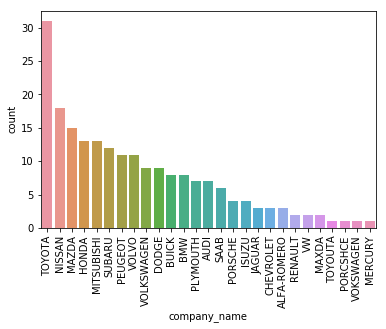

In [9]:
## It is observed that the Car Name contains two parts 'car company' + ''+ 'car_model'. 
## Lets split out inorder to get company name
car_data['company_name'] = car_data['CarName'].str.split(' ').str[0].str.upper()

## View the various company name and population count against each company
sns.countplot(car_data['company_name'],order = car_data['company_name'].value_counts(dropna=False).index)
plt.xticks(rotation = 90)

##### Observations:

- From the above plot we can see the data redundancy in the 'company_name' column.
- So we have to do the standardisation of the data bases the company_names. We can see many of company_names are mis-spelled.  
    - VOLKSWAGEN has VOLKSWAGEN, VOKSWAGEN and VW
    - MAZDA is also spelled as MAXDA
    - PORSCHE as PORSCHE and PORCSCHE.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

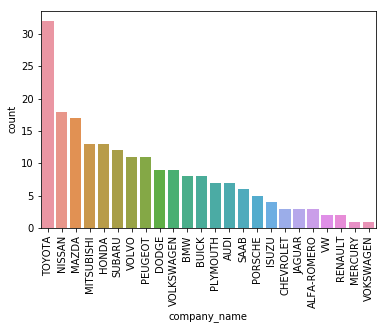

In [10]:
## As from the above plot we can see that 
# VOLKSWAGEN has VOLKSWAGEN, VOKSWAGEN and VW
# MAZDA is also spelled as MAXDA
# PORSCHE as PORSCHE and PORCSCHE.
## Lets Standardise the names of company_name

def standardise_company_name(x):
    x = x.upper()
    if all([ele in x.upper() for ele in ['VW', 'VOKSWAGEN']]):
        return 'VOLKSWAGEN'
    elif 'MAXDA' in x:
        return 'MAZDA'
    elif 'PORCSHCE' in x:
        return 'PORSCHE'
    elif 'TOYOUTA' in x:
        return 'TOYOTA'
    else:
        return x
    
car_data['company_name'] = car_data['company_name'].apply(standardise_company_name)

sns.countplot(car_data['company_name'],order = car_data['company_name'].value_counts(dropna=False).index)
plt.xticks(rotation = 90)

##### Observations:
- From the above plot, we can tell that the 'Toyoto' company cars are being sold more.
- Top 3 companies who are selling more cars are:
    - Toyota
    - Nissan
    - Mazda
- Least selling cars are in the company of 'Vokswagen'

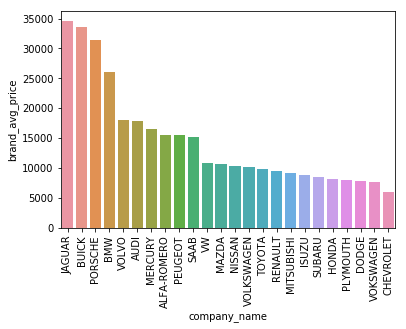

In [11]:
brand_wise_dist = car_data[['company_name','price']].groupby('company_name', as_index = False).mean().rename(columns={'price':'brand_avg_price'}).sort_values(['brand_avg_price'],ascending=False)
sns.barplot(x=brand_wise_dist['company_name'],y=brand_wise_dist['brand_avg_price'])
plt.xticks(rotation=90)
plt.show()

##### Observations:
- From the above plot we can say that the 'Jaguar' has highest cost in price when compared to others.
- Jaguar and Buck company seem to have bit difference in cost. But both seems almost the same  cost.
- Top 3 which costs the more is Jaguar, Buck and Porsche 
- While bottom 3 are Chevrolet, Vokswagon and Dodge.
- As when comparing the highest selling cars and costly cars, we can see that Vokswagon in bottom in both the cases.
- We can tell that Vokswagon being less costly and less selling car when compared to others.

In [12]:
## company name can be categorised as Luxury, Mid Ranged, Cheap based on their average price.
car_data = car_data.merge(brand_wise_dist)
car_data['company_category'] = car_data['brand_avg_price'].apply(lambda x : "Cheap" if x < 10000 
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))

##### Fuel Type

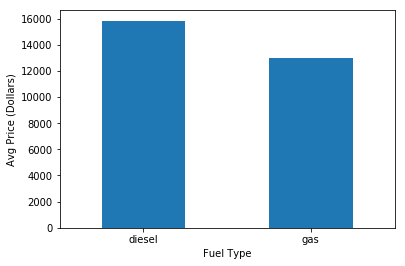

In [13]:
df_fuel_avg_price = car_data[['fueltype','price']].groupby("fueltype", as_index = False).mean().rename(columns={'price':'fuel_avg_price'})
df_fuel_avg_price.plot(x = 'fueltype', kind='bar',legend = False, sort_columns = True)
plt.xlabel("Fuel Type")
plt.ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 0)
plt.show()

##### Observations
From the above plot we can say that the diesel cars cost most when compared to the petrol car

##### Aspiration

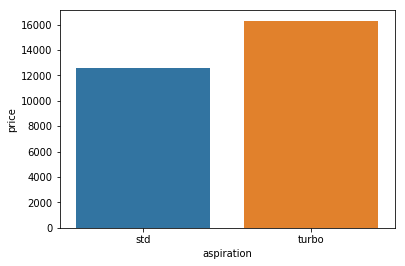

In [14]:
asp_avg = car_data[['aspiration','price']].groupby('aspiration',as_index=False ).mean()
sns.barplot(x='aspiration',y='price',data=asp_avg)

##### Observations
From the plot we can say that turbo aspiration engine ae priced more than standard ones.

##### Door Number

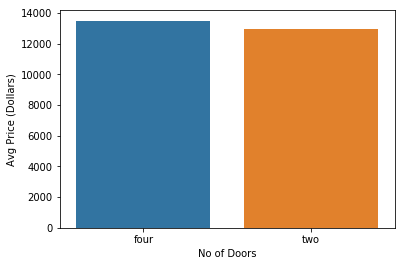

In [15]:
df_door_avg_price = car_data[['doornumber','price']].groupby("doornumber", as_index = False).mean().rename(columns={'price':'door_avg_price'})
sns.barplot(x='doornumber',y='door_avg_price',data=df_door_avg_price)
plt.xlabel("No of Doors")
plt.ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 0)
plt.show()

##### Observations
From the above plot we can say that number of doors doesnt seem to have much effect on the price.

##### Car Body

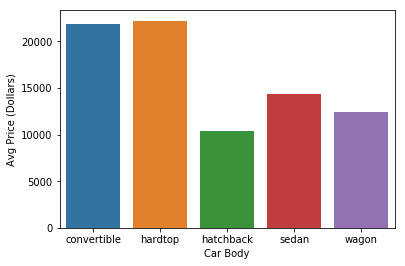

In [16]:
df_body_avg_price = car_data[['carbody','price']].groupby("carbody", as_index = False).mean().rename(columns={'price':'carbody_avg_price'})
sns.barplot(x='carbody',y='carbody_avg_price',data=df_body_avg_price)
plt.xlabel("Car Body")
plt.ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 0)
plt.show()

##### Observations
From the above plot we can say that
 - 'convertible','hardtop' are most expensive.
 - 'hatchback' seems to be cheapest.

##### Drivewheel

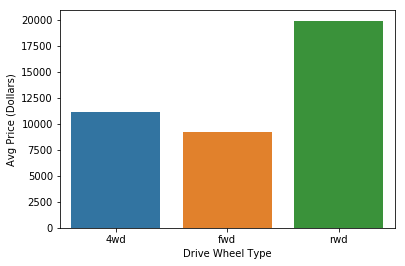

In [17]:
df_drivewheel_avg_price = car_data[['drivewheel','price']].groupby("drivewheel", as_index = False).mean().rename(columns={'price':'carbody_avg_price'})
sns.barplot(x='drivewheel',y='carbody_avg_price',data=df_drivewheel_avg_price)
plt.xlabel("Drive Wheel Type")
plt.ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 0)
plt.show()

##### Observations

 - From the above plot we can tell that Rear wheel drive have a higher price value.
 - 4wd and Fwd cost less when compared to the rwd.

##### WheelBase

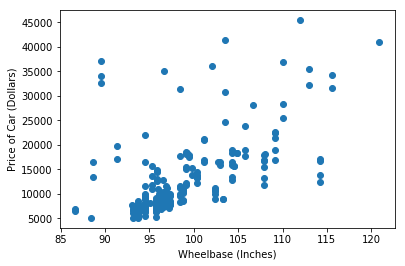

In [18]:
plt.scatter(x=car_data['wheelbase'], y=car_data['price'])
plt.xlabel('Wheelbase (Inches)')
plt.ylabel('Price of Car (Dollars)')
plt.show()

##### Observations

From the above plot we can say the following insights:
- Most car wheel base is 95 inches
- Price has a slight positive correlation with wheelbase.

##### Car  Dimensions

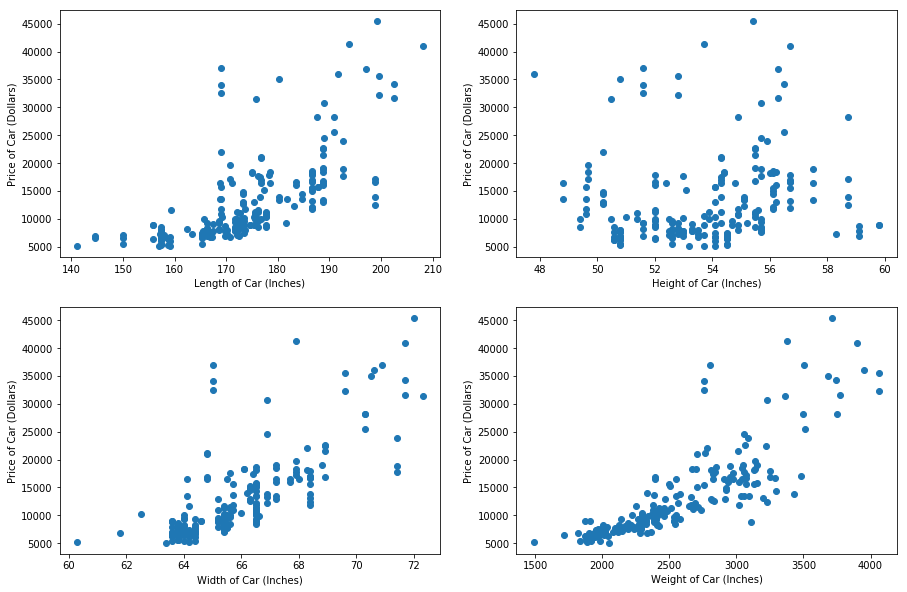

In [19]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.scatter(x=car_data['carlength'], y=car_data['price'])
plt.xlabel('Length of Car (Inches)')
plt.ylabel('Price of Car (Dollars)')

plt.subplot(2,2,2)
plt.scatter(x=car_data['carheight'], y=car_data['price'])
plt.xlabel('Height of Car (Inches)')
plt.ylabel('Price of Car (Dollars)')

plt.subplot(2,2,3)
plt.scatter(x=car_data['carwidth'], y=car_data['price'])
plt.xlabel('Width of Car (Inches)')
plt.ylabel('Price of Car (Dollars)')

plt.subplot(2,2,4)
plt.scatter(x=car_data['curbweight'], y=car_data['price'])
plt.xlabel('Weight of Car (Inches)')
plt.ylabel('Price of Car (Dollars)')
plt.show()

##### Observations

From the above plots we can say below insights:
 - Length, width, weight of the car is positively related with the price
 - There seems no correlation of height of the car

##### Engine Size, Bore Ratio, Stroke, Horsepower & Compression Ratio¶


Text(0,0.5,'Price of Car (Dollars)')

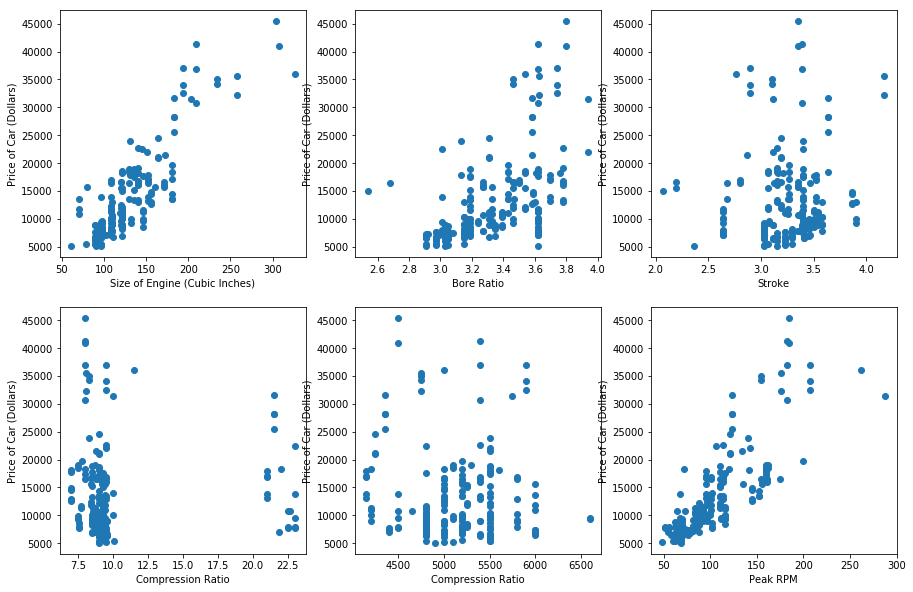

In [20]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.scatter(x = car_data['enginesize'], y = car_data['price'])
plt.xlabel('Size of Engine (Cubic Inches)')
plt.ylabel('Price of Car (Dollars)')


plt.subplot(2,3,2)
plt.scatter(x = car_data['boreratio'], y = car_data['price'])
plt.xlabel('Bore Ratio')
plt.ylabel('Price of Car (Dollars)')

plt.subplot(2,3,3)
plt.scatter(x = car_data['stroke'], y = car_data['price'])
plt.xlabel('Stroke')
plt.ylabel('Price of Car (Dollars)')

plt.subplot(2,3,4)
plt.scatter(x = car_data['compressionratio'], y = car_data['price'],)
plt.xlabel('Compression Ratio')
plt.ylabel('Price of Car (Dollars)')

plt.subplot(2,3,5)
plt.scatter(x = car_data['peakrpm'], y = car_data['price'],)
plt.xlabel('Compression Ratio')
plt.ylabel('Price of Car (Dollars)')

plt.subplot(2,3,6)
plt.scatter(x = car_data['horsepower'], y = car_data['price'],)
plt.xlabel('Peak RPM')
plt.ylabel('Price of Car (Dollars)')


##### Observations

From the above plot we can say that Size of Engine, bore ratio, and Horsepower has positive correlation with price

##### City Mileage and Highway Mileage

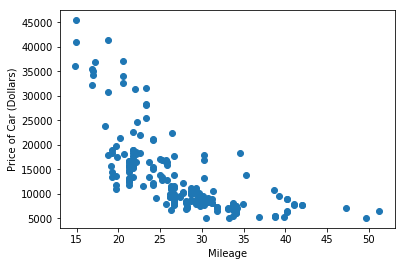

In [21]:
# A single variable mileage can be calculated taking the weighted average of 55% city and 45% highways.
car_data['mileage'] = car_data['citympg']*0.55 + car_data['highwaympg']*0.45
plt.scatter(x = car_data['mileage'], y = car_data['price'])
plt.xlabel('Mileage')
plt.ylabel('Price of Car (Dollars)')
plt.show()

##### Observations

From the above plot we can say that Mileage has a negative correlation with price.


### Bivariate Analysis¶


##### Company Category - Mileage


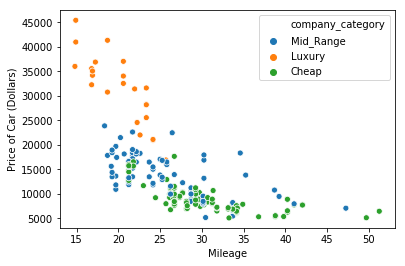

In [22]:
sns.scatterplot(x = 'mileage', y = 'price', hue = 'company_category', data = car_data)
plt.xlabel('Mileage')
plt.ylabel('Price of Car (Dollars)')
plt.show()

##### Observations
 - From the above plot we can see that Larger the price lower the mileage
 - We can see the orange colored points distribution is more distributed at higher price rate.
 - Mid_Range and Cheap seems to show better mileage with a lower cost

##### Mileage - Fuel Type

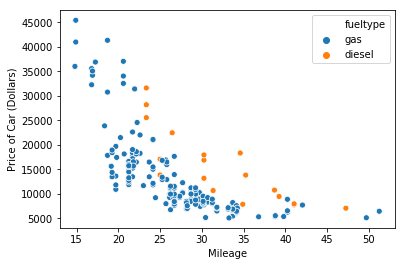

In [23]:
sns.scatterplot(x = 'mileage', y = 'price', hue = 'fueltype', data = car_data)
plt.xlabel('Mileage')
plt.ylabel('Price of Car (Dollars)')
plt.show()

##### Observations

- From the above plot we can see no distribution, as we that based on fuel type there is no pattern.

##### Horsepower - Fuel Type

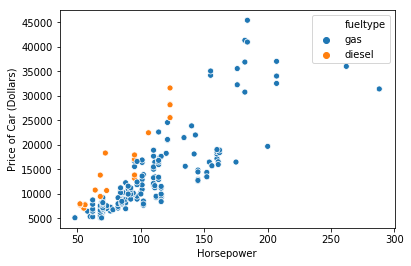

In [24]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'fueltype', data = car_data)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

##### Observations

- From the above plot we can see no distribution, as we that based on horsepower,fuel type and price there is no pattern.

### Summary Univariate and Bivriate Analysis:¶


From the above Univariate and bivariate analysis we can filter out variables which does not affect price much.
The most important driver variable for prediction of price are:-

1. Brand Category
2. Fuel Type
3. Aspiration
4. Car Body
5. Drive Wheel
6. Wheelbase
7. Car Length
8. Car Width
9. Curb weight
10. Engine Type
11. Cylinder Number
12. Engine Size
13. Bore Ratio
14. Horsepower
15. Mileage

In [25]:
car_data1 = car_data[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price', 'company_category', 'mileage']]

### Correlation

- From the pair wise plot we can see the correlation between two variables.
- We can see that wheelbase and car length seems to have linear relationship with each other.
- Similarly wheelbase and carwidth also shows linear relationship between each other.
- Most likely as we see each plots define to show some pattern if we see the plot as overall.

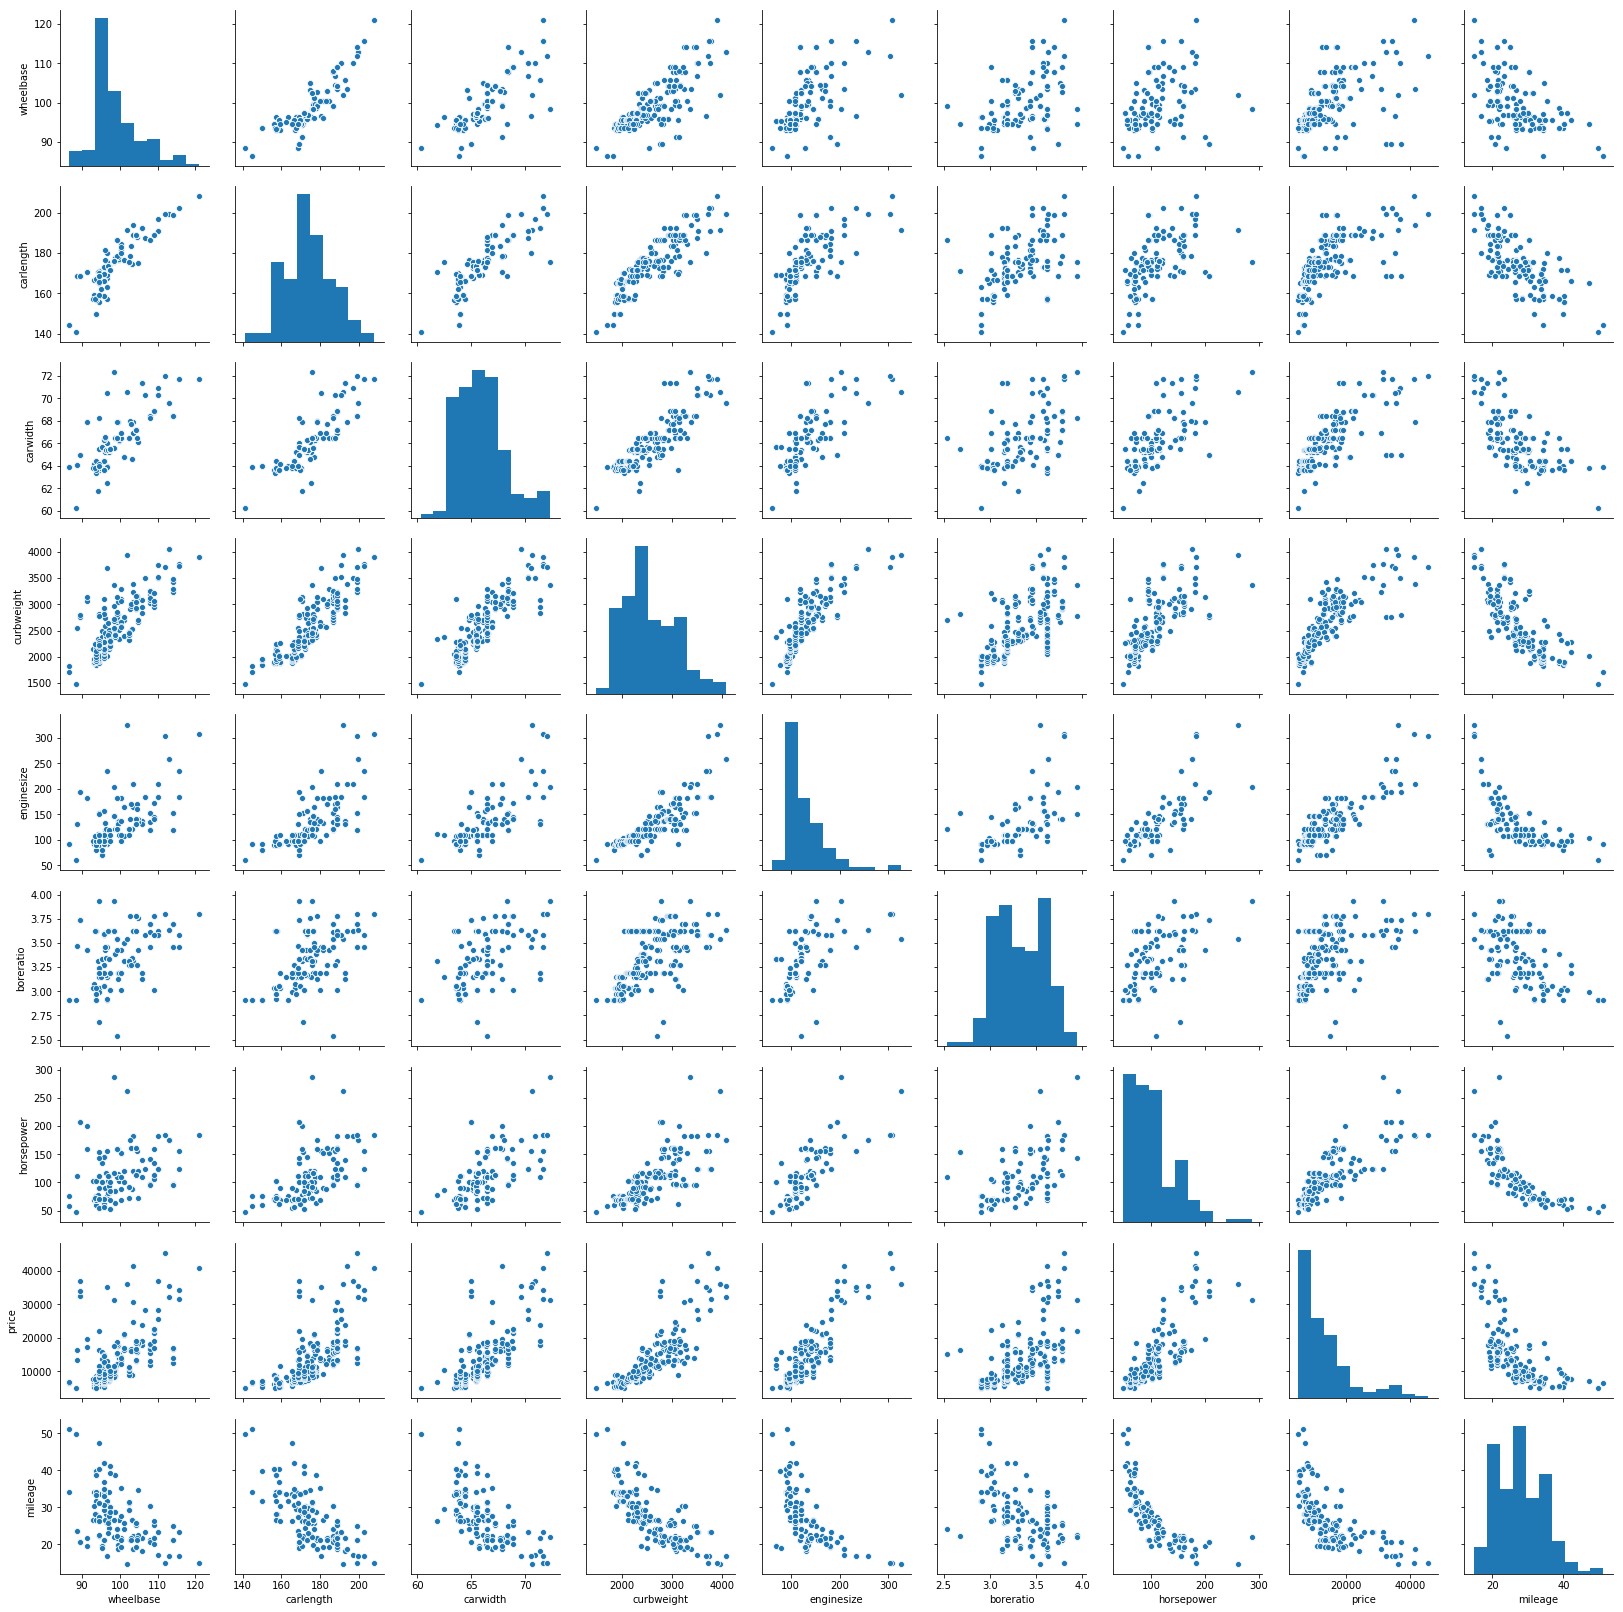

In [26]:
sns.pairplot(car_data1)

### Dummy Variable Creation

- A Dummy variable or Indicator Variable is an artificial variable created to represent an attribute with two or
more distinct categories/levels. 
- Regression analysis treats all independent (X) variables in the analysis as numerical.
- If you are analysing your data using multiple regression and any of your independent variables were measured on a nominal or ordinal scale, you need to know how to create dummy variables and interpret their results. 
- This is because nominal and ordinal independent variables, more broadly known as categorical independent variables, cannot be directly entered into a multiple regression analysis.
- Instead, they need to be converted into dummy variables. 
- The exception is ordinal independent variables that are entered into a multiple regression as continuous independent variables, which do not need to be converted into dummy variables. 

In [27]:
def return_dummy(lst,data):
    for col in lst:
        df = pd.get_dummies(car_data1[col],drop_first=True)
        data = pd.concat([data.drop([col],axis=1),df],axis=1)
    return data

cat_columns= ['fueltype','aspiration','carbody','drivewheel','cylindernumber','enginetype','company_category']
car_data2 = return_dummy(cat_columns,car_data1)
car_data2.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,gas,...,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor,Luxury,Mid_Range
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,23.70,1,...,0,0,0,0,0,0,0,0,0,1
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,23.70,1,...,0,0,0,0,0,0,0,0,0,1
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,22.15,1,...,0,0,0,0,0,0,1,0,0,1
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,26.70,1,...,0,0,0,0,1,0,0,0,0,1
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,19.80,1,...,0,0,0,0,1,0,0,0,0,1


### SPLITTING AND SCALING THE DATA

##### Splitting the dataset 
Splitting the data into train and test with a train size of 70%

##### Scaling the data
- Feature scaling is a method used to normalize the range of independent variables or features of data.
- The results would vary greatly between different units, 5kg and 5000gms. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.
- To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling
- For this problem, we are using MinMax scalar procedure.
- MinMaxScaler(feature_range = (0, 1)) will transform each value in the column proportionally within the range [0,1]. Use this as the first scaler choice to transform a feature, as it will preserve the shape of the dataset (no distortion).

In [28]:
train,test = train_test_split(car_data2,train_size = 0.7,random_state=100)
scaler = MinMaxScaler()
num_vals = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'price', 'mileage']
train[num_vals] = scaler.fit_transform(train[num_vals])

train.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,gas,...,twelve,two,dohcv,l,ohc,ohcf,ohcv,rotor,Luxury,Mid_Range
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,0.219310,0.358265,0.909091,...,0.006993,0.027972,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.118881,0.412587
std,0.205581,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,0.215682,0.185980,0.288490,...,0.083624,0.165472,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.324786,0.494030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,0.067298,0.198903,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,0.140343,0.344307,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,0.313479,0.512346,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 #### CORRELATION MATRIX:
- A correlation matrix is simply a table which displays the correlation coefficients for different variables. 
- The matrix depicts the correlation between all the possible pairs of values in a table.
- It is a powerful tool to summarize a large dataset and to identify and visualize patterns in the given data.
- A correlation matrix consists of rows and columns that show the variables. Each cell in a table contains the correlation coefficient.

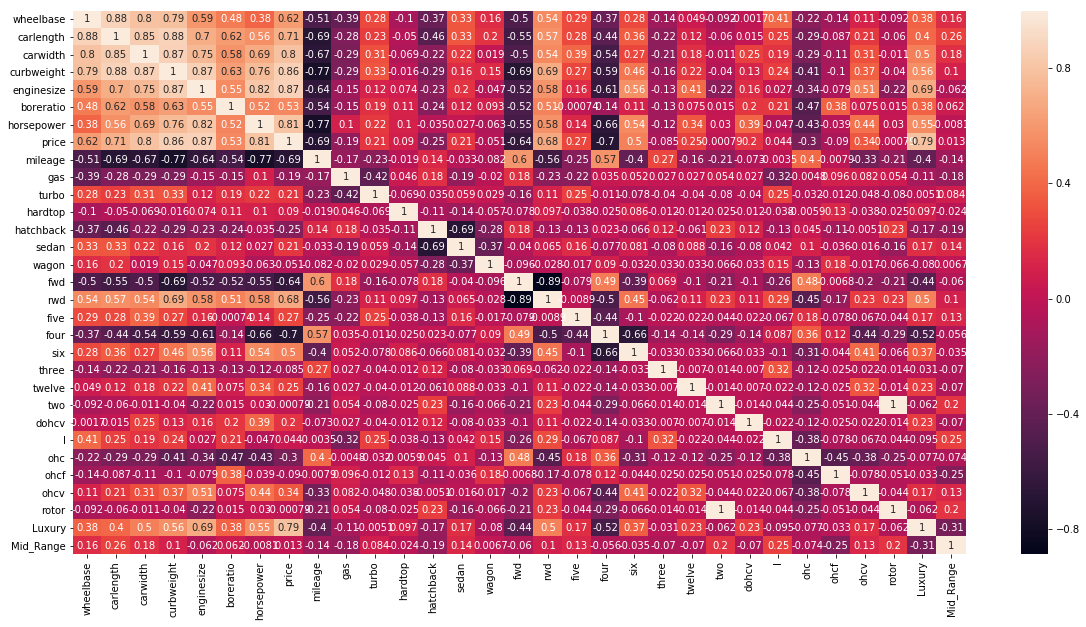

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True)

##### Observation:
From the above heat map we can notice the below insights:
      
  - The variable 'carlength','curbweight' seems to have high correlation of 0.88.
  - The variable 'carwidth','carlength' seems to have correlation of 0.84.
  - The variable 'wheelbase','carlength' seems to have correlation of 0.87.
  - The variable 'wheelbase','carwidth' seems to have correlation of 0.80.
  - The variable 'carwidth','curbweight' seems to have high correlation of 0.87.
  - The variable 'wheelbase','curbweight' seems to have correlation of 0.078.
      - From the above correlation , we can say that the variables 'carwidth','carlengh','wheelbase','curbweight' are highly correlated to each other, which mean that we have to remove any three of them out of four inorder to make the independent variables non-collinear.

### MODELLING:

#### RECURSIVE FEATURE ELIMINATION METHOD:
- Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Features are ranked by the model’s coef_ or feature_importances_ attributes, and by recursively eliminating a small number of features per loop, RFE attempts to eliminate dependencies and collinearity that may exist in the model.
- In the below procedure we have assumed let we take Top 10 dependency variable for this model.
- Based on the P value and VIF we would start eliminating the variables until we reach a point where we could not eliminate

In [30]:
#Dividing data into X and y variables
train1 = train.copy()
y_train = train1.pop('price')
X_train = train1

In [31]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,10)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('mileage', True, 1),
 ('gas', False, 17),
 ('turbo', False, 18),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 21),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 20),
 ('Luxury', True, 1),
 ('Mid_Range', False, 12)]

##### Based on the VIF values we have extracted the  Top 10 variables with filtered

In [32]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,carwidth,curbweight,horsepower,mileage,hatchback,sedan,wagon,twelve,dohcv,Luxury
122,0.291667,0.272692,0.083333,0.530864,0,1,0,0,0,0
125,0.666667,0.500388,0.395833,0.213992,1,0,0,0,0,1
166,0.308333,0.314973,0.266667,0.344307,1,0,0,0,0,0
1,0.316667,0.411171,0.262500,0.244170,0,0,0,0,0,0
199,0.575000,0.647401,0.475000,0.122085,0,0,1,0,0,0


#### Function which are been used for Building the model and check the VIF

In [34]:
def build_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit()
    print(lm.summary())
    return X

def VIF_check(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X_train_new.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### MODEL 1
- In the below step we are building the model based on the Top 10 variables obtained from the RFE model.
- After Building the model, we will see the summary and decide on variables.
- In the below summary we can see that the R-square and adjusted R-square seems to be having 0.92 as a confidence.
- For the below problem let the significance level be 0.05
- But when we compare the P value for twelve has 0.079 which is greater than 0.05
- Possessing greather P value mean that we have high confident that the variable is insignificant. So as per the understanding if the variable is insignificant, it would be better to drop it instead of we keeping that variable.
- So we decide to drop the model and rebuilt the model

In [35]:
X_train_new1 = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           1.29e-70
Time:                        21:05:23   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0947      0.042     -2.243      0.0

P value of twelve seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [36]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

### MODEL 2
- In the below procedure we re-built the model after dropping the column 'twelve' 
- After Building the model, we will see the summary and decide on variables.
- In the below summary we can see that the R-square and adjusted R-square seems to be having 0.92 as a confidence.
- For the below problem let the significance level be 0.05
- But when we compare the P value for mileage has 0.154 which is greater than 0.05
- So we would drop the mileage column

In [37]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           4.25e-71
Time:                        21:05:55   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0764      0.041     -1.851      0.0

P value of MILAGE seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [38]:
X_train_new = X_train_new.drop(["mileage"], axis = 1)

### MODEL 3

- In the below procedure we re-built the model after dropping the column 'mileage' 
- After Building the model, we will see the summary and decide on variables.
- In the below summary we can see that the R-square and adjusted R-square seems to be having 0.92 as a confidence.
- From the below plot we can see based on p value, all variables seems significant.
- So lets calculate VIF for all variables, 'curbweight' has highest VIF value greater than 5.
- VIF define the collinearity factor, larger the value  higher would be the dependency of that variable on other columns.
- So we have to drop the column inorder to drop the dependency varibles on independent variables, so that we keep only independent variables for modelling.
- independent variables mean that there shouldnt be any dependency. If there are any dependency, we have to remove it and rebuilt the model.
- In the below VIF check, we can see that curbweight possess larger value value for VIF when compared to 5. So it is better to drop the column. So we drop the column and re-built the model.

In [39]:
### Re-building the model
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           7.86e-72
Time:                        21:06:13   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [40]:
#Calculating the Variance Inflation Factor
VIF_check(X_train_new)

,Features,VIF
0,const,26.90
2,curbweight,8.10
5,sedan,6.07
4,hatchback,5.63
1,carwidth,5.14
3,horsepower,3.61
6,wagon,3.58
8,Luxury,1.63
7,dohcv,1.46


dropping curbweight because of high VIF value. (shows that curbweight has high multicollinearity.)

### MODEL 4

- In the below procedure we re-built the model after dropping the column 'curbweight' 
- After Building the model, we will see the summary and decide on variables.
- In the below summary we can see that the R-square and adjusted R-square seems to be having 0.92 as a confidence.
- From the below plot we can see based on p value, all variables seems significant.
- In the below VIF check, we can see that 'sedan' possess larger value value for VIF when compared to 5. So it is better to drop the column. So we drop the column and re-built the model.

In [41]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           4.70e-70
Time:                        21:06:19   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [42]:
VIF_check(X_train_new)

,Features,VIF
0,const,26.89
4,sedan,6.06
3,hatchback,5.54
5,wagon,3.47
2,horsepower,2.50
1,carwidth,2.22
7,Luxury,1.56
6,dohcv,1.21


dropping sedan because of high VIF value.



### MODEL 5

- In the below procedure we re-built the model after dropping the column 'sedan' 
- After Building the model, we will see the summary and decide on variables.
- In the below summary we can see that the R-square and adjusted R-square seems to be having 0.92 as a confidence.
- From the below plot we can see based on p value, all variables seems significant.

In [43]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           1.68e-69
Time:                        21:06:20   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [44]:
VIF_check(X_train_new)


,Features,VIF
0,const,10.82
2,horsepower,2.39
1,carwidth,2.09
6,Luxury,1.55
3,hatchback,1.23
5,dohcv,1.21
4,wagon,1.11


### MODEL 6

- In the below procedure we re-built the model after dropping the column 'sedan' 
- After Building the model, we will see the summary and decide on variables.
- In the below summary we can see that the R-square and adjusted R-square seems to be having 0.91 as a confidence.
- For the below problem let the significance level be 0.05
- But when we compare the P value for 'wagon' has 0.315 which is greater than 0.05
- So we would drop the 'wagon' column

In [45]:
X_train_new = X_train_new.drop(["wagon"], axis = 1)
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           1.57e-70
Time:                        21:06:21   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [46]:
VIF_check(X_train_new)

,Features,VIF
0,const,10.39
2,horsepower,2.39
1,carwidth,2.08
5,Luxury,1.53
4,dohcv,1.21
3,hatchback,1.13


In [47]:
#Dropping dohcv to see the changes in model statistics
X_train_new = X_train_new.drop(["dohcv"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
VIF_check(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           1.04e-67
Time:                        21:06:22   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

,Features,VIF
0,const,10.04
2,horsepower,2.22
1,carwidth,2.08
4,Luxury,1.53
3,hatchback,1.10


### Residual Analysis of Model


- Normality of the residuals is the assumption of running a linear model.
- If your residuals are normal,it means that your assumption is valid and model inference(confidence interval,model prediction) should be valid. 
- If the true distribution of the random errors is such that the scatter in the data is less than it would be under a normal distribution, it is possible that the intervals used to capture the values of the process parameters will simply be a little longer than necessary.
- The intervals will then contain the true process parameters more often than expected. It is more likely, however, that the intervals will be too short or will be shifted away from the true mean value of the process parameter being estimated.
- This will result in intervals that contain the true process parameters less often than expected. When this is the case, the intervals produced under the normal distribution assumption will likely lead to incorrect conclusions being drawn about the process

Text(0.5,0,'Errors')

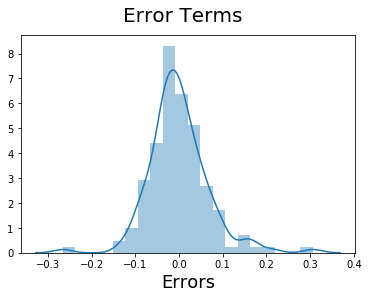

In [48]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

### PREDICTION AND EVALUATION

#### PREDICTION FOR TEST DATASET

In [49]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','mileage','carlength','carwidth','price']
test[num_vars] = scaler.fit_transform(test[num_vars])

In [50]:
#Dividing into X and y
y_test = test.pop('price')
X_test = test

In [51]:
# Now let's use our model to make predictions.
X_train_new1 = X_train_new.copy()
X_train_new1 = X_train_new1.drop('const',axis=1)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new1.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [52]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [53]:
# Evaluation of test via comparison of y_pred and y_test
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8614575410189549

##### Observations
- After building the model, we have to predict the value on test dataset for the comparision of the prices.
- In the above set we have repeated the procedure of scaling,addng the constant to the dataset on test dataset. 
- Then we would use the previously built model to predict the values of model for test dataset.
- Then after building the model, We have evaluated the R-square value for test dataset. 
- We obtained the R-square value of test data to be 0.86 when compared to train data value of 0.89.
- So we can say that it is pretty much good predicting model.

#### EVALUATION OF THE MODEL

Text(0,0.5,'y_pred')

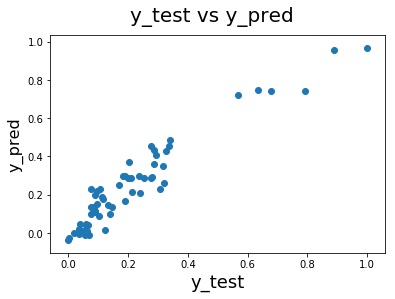

In [54]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

### Evaluation of the model using Statistics¶


In [55]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Sat, 18 Jan 2020   Prob (F-statistic):           1.04e-67
Time:                        21:06:29   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

Inference :
- R-sqaured and Adjusted R-squared (extent of fit) - 0.899 and 0.896 - 90% variance explained.
- F-stats and Prob(F-stats) (overall model fit) - 308.0 and 1.04e-67(approx. 0.0) - Model fir is significant and explained 90% variance is just not by chance.
- p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

### Cross Validation

-  Cross validation (CV) is one of the technique used to test the effectiveness of a machine learning models, it is also a re-sampling procedure used to evaluate a model if we have a limited data.
- To perform CV we need to keep aside a sample/portion of the data on which is do not use to train the model, later us this sample for testing/validating. There are many methods
- Steps:
    1. <b>Train_Test Split </b> 
        - We randomly split the complate data into training and test data. Ideally the split would be 70:30 or 80:20.
        - Then we perform the model training on train dataset and use the test set for validation purpose.
        - With this approach there is possibility of high bias if we have limited data because we would have miss some information about the data which we are not used for training.
        - If our data is huge and our test sample and train sample has the same distribution then this approach is acceptable.

##### Calculating score for  test dataset

In [92]:
lm = LinearRegression()
lm.fit(X_train_new,y_train)
print('The Score for the test dataset is ',lm.score(X_test_new,y_test))

The Score for the test dataset is  0.8614575410189547


##### Calculating score using cross validation

In [93]:
from sklearn.model_selection import cross_val_score
X_train_valid = sm.add_constant(car_data2)[X_train_new.columns]
y_train_valid = car_data2[['price']]
scores = cross_val_score(LinearRegression(),X_train_valid,y_train_valid,cv=4)
print('The Cross Validation for the above dataset is ',np.average(scores))

The Cross Validation for the above dataset is  0.8564683619521896


##### Observations

- The score value for test data set came down to be 86.1%
- The score value through cross validation came down to be 85.6%
- As from the above two scores are almost the same, we can say that model is not overfitted.